## Forest Cover Type Prediction
## Junfei Ma
###  Data from https://www.kaggle.com/competitions/dont-overfit-ii

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_columns', None)
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline
#models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.00,-1.07,-1.11,-0.62,0.38,1.09,0.47,-0.42,0.46,-0.44,-0.34,0.42,-2.18,-0.33,0.34,1.17,-0.24,-1.07,-0.34,-0.50,0.40,-0.60,-0.28,-1.62,0.88,-0.27,0.87,2.17,-0.21,0.48,-2.09,0.83,0.62,-2.81,1.03,-0.74,0.58,-0.08,0.49,1.36,-0.18,0.41,-0.16,1.34,0.75,0.49,-1.56,-0.52,0.77,0.22,-0.51,0.10,-0.60,-0.72,-0.55,1.56,2.00,-1.94,1.28,-0.99,-1.37,1.37,-0.49,0.11,-0.52,0.05,-0.89,0.25,0.69,1.36,0.17,-1.12,1.21,0.89,0.87,0.85,-1.11,1.22,-1.30,-1.65,-0.09,0.26,0.73,-0.38,0.29,-0.72,0.84,1.00,-1.27,-0.04,1.16,0.78,-0.73,-0.50,1.84,1.46,0.85,1.93,-0.32,0.04,-0.29,0.12,-1.05,0.73,-1.00,-0.32,0.41,0.47,0.45,1.63,0.27,1.56,1.20,-0.55,-0.28,0.18,0.58,-1.87,0.93,0.72,0.89,0.04,-1.13,-1.58,0.62,1.96,-0.52,1.49,1.57,-0.48,0.59,-0.39,0.39,-1.03,-0.84,0.29,-0.23,-2.71,-0.47,0.48,-1.35,-0.92,0.33,-0.56,0.79,-1.04,-0.13,0.52,2.44,0.85,-0.64,-0.32,0.75,0.06,-1.46,-0.82,-0.08,1.13,-0.50,1.02,0.28,0.26,-0.28,-0.17,-0.09,-1.70,-0.60,-0.71,-0.43,0.35,0.97,-1.15,-0.16,0.39,-0.12,0.44,0.95,-0.61,-0.11,-0.49,-0.61,1.56,1.01,-1.39,0.81,-0.61,-0.86,1.23,0.12,-0.34,1.76,-1.65,-1.43,-1.32,-1.50,2.12,-0.57,1.18,-1.45,-0.37,2.39,1.88,0.76,0.29,1.26,-0.84,0.14,-0.18,0.76,0.62,1.37,0.82,-0.70,-1.27,0.50,-0.67,-0.33,-0.17,0.15,-1.13,0.08,1.27,-0.09,-1.43,1.64,0.69,0.95,-2.40,0.66,-0.43,0.12,-0.34,-2.82,0.57,-0.76,3.80,-0.00,1.00,-0.54,1.02,0.88,-1.04,0.51,0.69,0.86,-0.52,0.60,0.97,0.28,2.68,-0.06,-1.75,0.30,-2.20,0.80,-0.53,-0.66,0.56,-2.40,0.94,-0.97,0.06,1.11,-0.85,-1.78,0.25,-0.52,0.23,0.30,-1.77,2.03,-0.44,-0.12,1.39,-0.49,-0.18,1.87,1.46,-1.40,0.28,0.34,0.55,0.56,-0.52,-0.50,-0.54,1.39,0.51,-1.42,-0.12,-1.83,0.22,-0.34,0.25,-0.18,0.35,0.12,0.35,0.44,0.96,-0.82
1,1,0.00,-0.83,0.27,1.72,1.10,1.73,-0.20,1.90,-0.27,0.56,1.20,0.54,0.42,-1.57,-0.97,-1.48,0.56,0.05,-0.32,-1.49,0.18,-0.52,0.25,2.46,0.03,-1.40,-2.37,-1.50,-1.29,0.11,-0.14,0.23,-1.04,1.33,1.25,-0.81,1.81,0.18,-0.02,1.12,0.28,-0.68,1.16,1.19,0.24,1.18,1.34,-1.00,-0.36,-0.60,1.92,-1.16,0.39,-0.48,1.59,0.11,-0.96,0.60,-1.15,-1.06,3.08,1.06,0.95,-1.12,1.29,-0.17,1.12,-0.45,0.70,-0.03,2.21,0.01,0.87,2.29,-0.82,0.42,1.49,-0.33,-0.99,-0.07,0.54,-0.10,0.04,0.14,1.11,0.69,1.41,-0.23,-1.90,-0.13,0.93,0.80,-1.04,2.00,1.42,0.42,-0.35,-0.66,-0.05,1.04,-1.23,-0.85,-0.75,1.18,0.57,-1.47,-1.22,-0.89,0.00,-0.14,-0.93,-0.71,0.87,0.54,-0.91,-0.64,0.90,-1.90,-0.60,0.31,1.88,-0.29,-0.85,-0.45,0.89,0.34,2.10,0.34,1.29,0.06,-0.16,0.54,0.68,-1.01,-0.30,-1.30,-0.61,-1.18,0.12,0.07,-0.09,1.89,-0.12,0.43,0.14,1.78,0.55,-0.62,-1.21,0.39,0.14,1.03,0.10,-1.59,-0.55,1.15,0.59,1.12,-0.65,1.02,0.64,0.97,0.18,-1.13,0.12,0.43,-1.74,0.76,-1.45,0.92,-0.37,0.63,-0.36,-0.46,-1.99,0.38,-1.49,1.07,-0.62,-0.91,-0.27,0.50,0.03,-0.26,1.72,2.85,0.37,-1.69,0.38,-1.25,0.76,2.36,0.53,-0.39,-0.45,0.12,0.17,-0.73,-1.99,1.57,0.80,-0.27,-0.57,0.55,0.02,-0.55,-2.27,0.90,-1.68,-0.37,-0.19,0.83,-1.54,-0.27,-0.82,0.52,-1.66,0.31,0.64,-1.13,0.47,-1.41,1.33,-0.57,1.09,0.18,-0.35,-0.

In [4]:
df_test

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,250,-0.68,1.72,-0.74,-0.84,0.15,-1.14,0.24,0.50,-1.83,-1.38,0.00,-1.34,-0.37,-0.73,-0.55,-0.53,-1.14,1.26,-0.24,0.93,-1.15,0.94,0.72,-1.54,-1.47,0.40,0.54,0.61,-0.32,-1.42,0.47,-1.14,2.29,-0.58,-0.19,-1.25,-1.71,0.41,-1.45,2.21,0.67,2.08,-1.01,-0.87,1.17,1.11,-0.42,-0.81,0.46,1.57,0.04,0.04,-0.61,0.18,0.52,0.73,-2.80,-0.55,1.77,-1.16,0.95,-0.23,-0.52,0.80,-0.53,-0.06,0.33,-0.57,0.43,-0.07,0.78,0.23,-0.21,-0.35,0.97,-1.42,-1.12,0.52,0.51,-0.45,0.28,0.47,-0.06,0.01,0.86,-0.69,2.23,-1.07,-0.27,-0.10,0.23,0.61,-1.07,0.24,0.19,0.14,-0.57,-0.09,0.97,-0.36,-0.18,0.54,-0.79,-2.27,-0.66,-0.31,0.37,-1.17,1.19,0.20,-0.22,-0.38,1.67,-0.46,0.11,-0.43,0.42,0.31,-1.15,-0.81,-0.62,-0.03,-0.96,-0.51,0.88,1.68,-0.99,0.88,-0.05,-2.07,-0.44,-0.67,0.11,-0.27,1.41,-0.82,0.60,-0.94,0.33,-0.72,0.42,1.70,0.13,0.01,0.29,0.41,-1.02,-0.05,-0.26,-0.40,1.28,1.24,-0.09,0.06,0.65,-0.49,-0.99,-1.02,0.13,0.85,-0.41,0.82,-0.47,0.57,-0.28,0.10,0.25,0.74,-0.37,-0.33,1.84,0.74,-1.02,0.35,1.97,0.08,-0.23,-1.57,-0.61,0.04,-0.65,-0.52,1.75,0.10,0.59,-1.70,-0.68,1.14,1.57,1.48,-0.34,1.29,2.48,0.80,-0.37,-1.98,1.22,0.26,0.35,-1.13,-2.03,-0.30,-1.63,1.24,-1.15,1.64,-0.20,-0.62,1.02,2.44,-0.48,1.80,-0.14,-1.01,-0.14,-2.79,0.17,0.51,0.89,-0.11,-0.03,-2.86,-0.82,0.44,-0.57,-0.33,0.29,0.26,-0.80,0.83,0.69,-0.48,0.66,1.84,0.84,-0.58,0.64,0.73,-1.18,-1.80,0.04,-0.96,0.27,0.08,-0.10,-1.52,0.51,-0.44,-0.29,-0.21,1.31,-1.05,0.99,0.98,-0.81,2.19,0.45,0.20,-1.13,0.03,0.19,-0.76,-0.54,-0.23,0.31,-0.68,0.73,1.37,0.79,-0.93,0.65,-0.40,-0.24,1.62,0.09,-0.28,0.17,0.51,-0.32,1.04,-0.34,-1.17,0.24,-0.03,0.23,1.76,-1.51,-1.06,-0.56,0.66,-1.18,-0.40,0.76,-0.60,0.95,-0.35,0.45,-0.82,-0.28,1.30
1,251,-0.73,-0.25,0.06,0.05,1.15,2.46,0.84,0.72,-2.27,0.58,2.62,1.37,0.26,0.32,-0.01,1.84,0.58,0.69,0.10,-0.91,-0.77,-0.78,-0.66,-1.28,-0.92,-0.10,-0.46,-0.28,-0.32,0.33,-0.78,1.05,2.21,-0.59,1.22,1.35,-0.78,-0.16,0.12,-0.03,-0.09,-0.22,-0.68,-1.14,-0.77,-1.29,0.09,0.29,0.22,2.43,-0.96,0.94,2.66,-1.48,1.85,-0.15,-0.38,0.64,-0.35,0.26,0.18,0.23,-0.27,-1.05,0.68,0.51,-2.33,-0.79,-0.25,-1.63,-2.16,-0.29,2.05,0.58,1.02,0.19,-0.43,-2.35,1.04,0.48,1.12,-0.95,1.24,-0.17,1.09,1.27,-1.89,0.95,0.32,-2.13,-0.40,0.15,1.00,-0.11,1.43,1.25,1.24,-0.47,0.87,0.52,0.26,0.85,0.13,1.57,1.34,1.58,1.58,-0.19,1.40,-0.90,-1.51,0.19,-0.23,1.47,1.25,2.35,-0.43,0.06,0.38,1.25,1.68,0.45,-2.14,0.66,0.56,0.18,0.42,0.07,-0.30,0.07,1.28,-0.36,-0.05,-2.47,0.70,-0.42,-1.53,-0.20,-0.61,0.14,-0.99,0.70,-0.19,-0.19,0.28,-1.42,0.22,-0.26,-0.16,1.14,-0.28,0.97,-0.47,1.57,0.31,1.49,-0.16,0.22,-0.83,0.61,0.98,1.47,-1.20,0.25,1.61,-0.11,0.44,1.61,0.04,-1.86,-1.21,-0.34,-0.28,0.19,-0.51,0.76,-0.29,-0.27,0.74,-0.04,-0.92,-1.17,-0.26,1.14,0.27,-0.71,1.64,-0.31,-0.45,0.02,-0.11,-0.63,1.05,-0.08,0.05,0.91,-0.53,1.30,0.70,-0.36,1.17,2.39,1.00,0.45,-0.10,0.21,-1.35,0.84,-0.19,0.42,-0.59,-0.17,-1.64,1.05,-0.19,0.64,-0.42,-0.41,0.17,0.64,0.29,-0.05,-0.83,-1.18,-1.16,1.11,2.47,

In [5]:
#drop first id column
df_train = df_train.iloc[:,1:]
df_test = df_test.iloc[:,1:]

In [6]:
# Datatypes of the attributes
print(df_train.dtypes)

target    float64
0         float64
1         float64
2         float64
3         float64
           ...   
295       float64
296       float64
297       float64
298       float64
299       float64
Length: 301, dtype: object


In [7]:
df_train.isnull().any().any()

False

In [8]:
df_test.isnull().any().any()

False

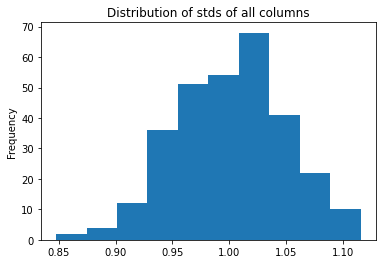

In [9]:
df_train[df_train.columns[1:]].std().plot(kind='hist');
plt.title('Distribution of stds of all columns');

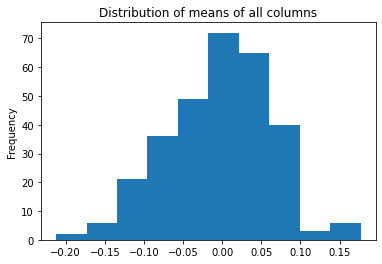

In [10]:
df_train[df_train.columns[1:]].mean().plot(kind='hist');
plt.title('Distribution of means of all columns');

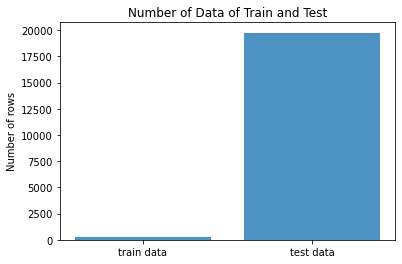

In [11]:
d_names = ('train data', 'test data')
y_pos = range(len(d_names))
 
plt.bar(
    y_pos, 
    (df_train.shape[0], df_test.shape[0]), 
    align='center', 
    alpha=0.8
)
plt.xticks(y_pos, d_names)
plt.ylabel('Number of rows') 
plt.title('Number of Data of Train and Test')
plt.show()

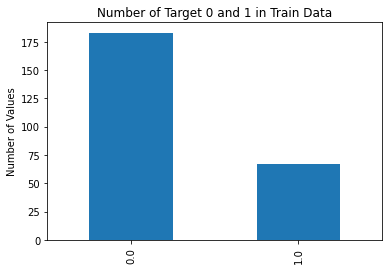

In [12]:
df_train['target'].value_counts().plot(kind='bar')
plt.ylabel('Number of Values') 
plt.title('Number of Target 0 and 1 in Train Data')
plt.show()

### Quick Basic Modelling

In [13]:
#Use the train set to modeling. The 70% train set will be train data and the 30% train set will be test data 
X =  df_train.iloc[:, 1:]
y =  df_train.iloc[:, 0]
X_train , X_valid , y_train , y_valid = train_test_split(X , y,  random_state = 12 ,test_size =0.3)

In [14]:
#Use lazycliassifier to get a baseline of the top models that perform well for this dataset
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_valid , y_train , y_valid)

100%|██████████| 29/29 [00:00<00:00, 29.85it/s]


In [15]:
#Do futher analysis on the top models 
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.75,0.63,0.63,0.76,0.08
NearestCentroid,0.73,0.53,0.53,0.73,0.01
QuadraticDiscriminantAnalysis,0.48,0.53,0.53,0.54,0.02
ExtraTreeClassifier,0.68,0.53,0.53,0.70,0.01
LogisticRegression,0.77,0.53,0.53,0.75,0.02
LGBMClassifier,0.75,0.51,0.51,0.73,0.06
LinearDiscriminantAnalysis,0.69,0.51,0.51,0.71,0.02
LinearSVC,0.69,0.51,0.51,0.71,0.01
GaussianNB,0.79,0.51,0.51,0.75,0.01


### Feature selection

In [16]:
ex_tree = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
ex_tree.fit(X, y)

importances = ex_tree.feature_importances_

result = np.argsort(importances)[::-1]
#Top 15 
result_1 = result[:15]
#Top 30
result_2 = result[:30]
#Top 45
result_3 = result[:45]


In [17]:
print("Top 15 features with high importances")
print("")
print(tabulate({"Feature": result_1,
                "Importance": importances[result_1]}, headers="keys"))

Top 15 features with high importances

  Feature    Importance
---------  ------------
      127    0.0315393
      176    0.0165536
      241    0.0125817
      133    0.0122419
      135    0.0112626
      126    0.0110998
       59    0.0106864
       16    0.0102944
      220    0.00994916
      199    0.00975761
       74    0.00921488
      169    0.00847279
       66    0.00846303
       93    0.00787209
       18    0.00781415


In [18]:
rfe = RFE(ExtraTreesClassifier(n_jobs=-1, random_state=1))

rfe.fit(X, y)

print('Selected Features Using RFE:')
selected_features = df_train.columns.drop(['target'])[rfe.support_].tolist()
print(len(selected_features))

Selected Features Using RFE:
150


In [19]:
print(selected_features)

['0', '1', '3', '4', '6', '9', '10', '13', '16', '18', '19', '23', '24', '29', '30', '32', '33', '34', '35', '37', '39', '42', '46', '48', '50', '52', '53', '54', '56', '58', '59', '61', '63', '66', '68', '69', '70', '73', '74', '75', '76', '77', '89', '90', '93', '95', '96', '97', '100', '103', '106', '109', '110', '113', '115', '116', '117', '119', '121', '123', '124', '126', '127', '133', '134', '135', '136', '140', '141', '143', '144', '145', '146', '147', '149', '150', '154', '155', '159', '160', '162', '163', '167', '169', '172', '176', '177', '178', '180', '181', '183', '184', '185', '186', '188', '191', '192', '195', '198', '199', '200', '201', '205', '206', '208', '211', '213', '214', '215', '218', '219', '220', '228', '229', '230', '231', '234', '236', '237', '239', '241', '243', '244', '247', '248', '249', '250', '251', '255', '260', '262', '263', '264', '267', '268', '270', '271', '273', '275', '276', '278', '279', '280', '281', '283', '284', '285', '289', '292', '299']


In [20]:
X_train , X_valid , y_train , y_valid = train_test_split(X[selected_features] , y,  random_state = 12 ,test_size =0.3)

In [21]:
#Use lazycliassifier to get a baseline of the top models that perform well for this dataset
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_valid , y_train , y_valid)

100%|██████████| 29/29 [00:00<00:00, 42.20it/s]


In [22]:
#Do futher analysis on the top models 
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.83,0.68,0.68,0.82,0.01
AdaBoostClassifier,0.79,0.66,0.66,0.79,0.11
QuadraticDiscriminantAnalysis,0.53,0.66,0.66,0.58,0.01
GaussianNB,0.81,0.64,0.64,0.81,0.01
BernoulliNB,0.81,0.64,0.64,0.81,0.01
Perceptron,0.76,0.64,0.64,0.77,0.01
SGDClassifier,0.79,0.63,0.63,0.79,0.01
LinearSVC,0.71,0.61,0.61,0.73,0.01
DecisionTreeClassifier,0.60,0.61,0.61,0.65,0.01


### SMOTE Method for Unbalanced Target Variable

In [30]:
smote = SMOTE(sampling_strategy='minority', n_jobs=-1)
X_sm, y_sm = smote.fit_resample(X[selected_features], y)

df_train_new = pd.DataFrame(X_sm, columns= selected_features)
df_train_new['target'] = y_sm

df_train_new

,0,1,3,4,6,9,10,13,16,18,19,23,24,29,30,32,33,34,35,37,39,42,46,48,50,52,53,54,56,58,59,61,63,66,68,69,70,73,74,75,76,77,89,90,93,95,96,97,100,103,106,109,110,113,115,116,117,119,121,123,124,126,127,133,134,135,136,140,141,143,144,145,146,147,149,150,154,155,159,160,162,163,167,169,172,176,177,178,180,181,183,184,185,186,188,191,192,195,198,199,200,201,205,206,208,211,213,214,215,218,219,220,228,229,230,231,234,236,237,239,241,243,244,247,248,249,250,251,255,260,262,263,264,267,268,270,271,273,275,276,278,279,280,281,283,284,285,289,292,299,target
0,-1.07,-1.11,0.38,1.09,-0.42,-0.34,0.42,0.34,-1.07,-0.50,0.40,0.88,-0.27,-2.09,0.83,-2.81,1.03,-0.74,0.58,0.49,-0.18,1.34,-0.52,0.22,0.10,-0.72,-0.55,1.56,-1.94,-0.99,-1.37,-0.49,-0.52,0.25,1.36,0.17,-1.12,0.87,0.85,-1.11,1.22,-1.30,1.16,0.78,1.84,0.85,1.93,-0.32,0.12,-1.00,0.47,0.27,1.56,-0.28,0.58,-1.87,0.93,0.89,-1.13,0.62,1.96,1.49,1.57,-0.84,0.29,-0.23,-2.71,-0.92,0.33,0.79,-1.04,-0.13,0.52,2.44,-0.64,-0.32,-0.82,-0.08,0.28,0.26,-0.17,-0.09,-0.43,0.97,0.39,-0.61,-0.11,-0.49,1.56,1.01,0.81,-0.61,-0.86,1.23,-0.34,-1.43,-1.32,-0.57,-0.37,2.39,1.88,0.76,0.14,-0.18,0.62,-0.70,0.50,-0.67,-0.33,-1.13,0.08,1.27,-0.43,0.12,-0.34,-2.82,3.80,1.00,-0.54,0.88,0.51,0.86,-0.52,0.28,2.68,-0.06,-1.75,0.30,-0.66,0.06,-0.85,-1.78,0.25,0.30,-1.77,-0.44,-0.12,-0.49,1.87,1.46,0.28,0.34,0.55,0.56,-0.50,-0.54,1.39,-1.83,0.25,-0.82,1.00
1,-0.83,0.27,1.10,1.73,1.90,1.20,0.54,-0.97,0.05,-1.49,0.18,0.03,-1.40,-0.14,0.23,1.33,1.25,-0.81,1.81,-0.02,0.28,1.19,-1.00,-0.60,-1.16,-0.48,1.59,0.11,0.60,-1.06,3.08,0.95,1.29,-0.45,-0.03,2.21,0.01,-0.82,0.42,1.49,-0.33,-0.99,0.93,0.80,1.42,-0.35,-0.66,-0.05,-0.85,0.57,-0.89,-0.93,-0.71,-0.91,0.90,-1.90,-0.60,1.88,-0.85,0.89,0.34,0.34,1.29,-0.30,-1.30,-0.61,-1.18,1.89,-0.12,0.14,1.78,0.55,-0.62,-1.21,0.14,1.03,1.15,0.59,0.64,0.97,-1.13,0.12,-1.45,-0.37,-0.46,1.07,-0.62,-0.91,0.50,0.03,1.72,2.85,0.37,-1.69,-1.25,0.53,-0.39,0.17,1.57,0.80,-0.27,-0.57,-2.27,0.90,-0.37,-1.54,-0.82,0.52,-1.66,-1.13,0.47,-1.41,0.12,1.28,1.79,-1.00,-1.09,-1.39,-0.18,0.81,0.96,1.27,-0.88,0.61,-0.65,0.12,-1.94,-1.36,-0.24,0.63,0.50,-0.05,0.32,0.93,-0.20,0.76,1.75,-3.03,-0.26,-0.42,-0.50,-0.05,1.10,0.40,0.58,-0.54,0.44,-0.61,-1.16,-0.34,0.00
2,0.10,1.39,-1.06,0.01,-1.45,-0.02,-0.67,-1.37,-1.55,0.51,-0.09,0.64,-1.37,-1.25,0.44,-1.27,-0.74,0.83,-1.31,-1.57,-1.23,-0.26,-0.03,0.41,2.04,-0.18,-0.88,-0.34,-0.70,-0.10,0.69,0.92,-0.97,-1.53,-1.15,-1.76,-0.32,-1.57,-0.98,1.01,0.39,-0.19,1.31,-0.46,-0.18,3.17,2.74,0.91,0.88,0.27,-0.49,0.09,0.06,-0.30,-0.32,-1.41,1.59,-0.65,0.05,-1.33,-0.55,0.65,0.02,0.08,-1.29,-0.31,0.25,-0.52,0.12,1.86,-0.41,1.92,-0.85,0.82,-0.10,1.88,0.19,-1.43,0.87,-0.91,2.27,-0.22,-0.82,-1.12,-0.81,2.00,-0.32,0.92,1.16,0.23,-0.99,-1.00,0.31,0.20,0.10,-0.25,2.04,1.07,0.96,-0.09,-0.08,0.32,-1.37,-0.42,0.74,-1.60,-1.74,-1.45,-0.76,-1.19,-0.02,-0.29,0.65,-1.32,0.47,-0.57,0.36,-0.44,0.33,0.32,1.00,1.13,0.14,0.91,-0.76,-0.11,0.22,1.68,0.26,-1.61,1.56,0.63,-0.07,-1.23,0.31,-0.34,1.15,-0.05,-0.93,0.67,0.67,-0.60,-0.14,0.97,0.53,-1.49,-0.92,-0.86,-1.00,0.72,0.00
3,-0.99,-0.92,0.14,0.54,1.13,-0.64,0.76,-1.00,0.02,-0.94,0.07,-0.55,-1.74,-0.68,0.81,-0.44,-1.78,0.55,0.32,1.30,0.25,0.88,-2.03,-0.34,-1.28,0.02,-1.80,-2.19,0.43,-0.47,-1.25,0.65,-0.98,-0.44,0.58,1.36,2.19,0.31,-1.82,-1.16,-0.21,-0.59,-1.42,-0.11,1.22,-1.77,0.18,-0.18,0.46,-0.29,-0.25,-2.12,-0.44,-0.99,1.70,0.87,0.51,1.24,0.72,0.79,0.07,-0.72,0.82,0.55,-0.11,1.26,0.32,1.12,-2.03,-1.13,-0.87,1.18,-0.07,1.14,-0.81,-1.18,-1.39,-0.75,-0.16,1.56,-1.46,1.17,-0.70,0.37,-0.13,-2.85,-0.47,-0.25,0.19,-1.17,-0.47,-0.53,-0.62,0.42,1.37,-1.85,0.24,-1.38,0.17,-0.21,1.16,-0.01,0.79,-1.69,1.15,-0.25,-1.41,0.68,-0.07,1.19,0.89,-0.64,1.87,-0.91,-1.53,-0.35,0.28,1.66,-0.86,-0.47,-1.14,0.63,-0.69,-0.73,-0.07,-1.50,1.38,-0.26,2.21,0.01,0.50,-0.26,-1.48,0.19,-0.14,-1.62,-0.66,-1.13,-0.36,0.69,1.73,-0.61,0.51,-0.51,0.38,-1.12,1.70,-0.78,0.60,3.40,1.00
4,0.81,-1.51,-0.36,-0.22,0.33,-0.50,-0.65,0.65,0.72,0.40,-1.04,1.72,-1.98,0.13,1.08,0.20,1.14,1.12,0.43,-2

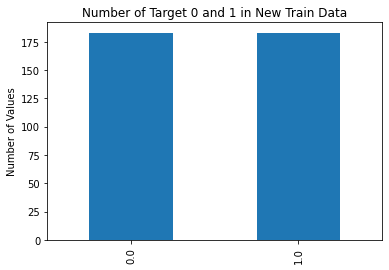

In [31]:
df_train_new['target'].value_counts().plot(kind='bar')
plt.ylabel('Number of Values') 
plt.title('Number of Target 0 and 1 in New Train Data')
plt.show()

In [32]:
X = df_train_new.iloc[:,:-1]


In [33]:
X_train , X_valid , y_train , y_valid = train_test_split(X , y,  random_state = 12 ,test_size =0.3)

In [34]:
#Use lazycliassifier to get a baseline of the top models that perform well for this dataset
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_valid , y_train , y_valid)

100%|██████████| 29/29 [00:00<00:00, 30.80it/s]


In [35]:
#Do futher analysis on the top models 
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.01
SVC,0.94,0.94,0.94,0.94,0.02
NuSVC,0.94,0.94,0.94,0.94,0.02
ExtraTreesClassifier,0.93,0.93,0.93,0.93,0.08
RandomForestClassifier,0.92,0.92,0.92,0.92,0.14
CalibratedClassifierCV,0.90,0.90,0.90,0.90,0.13
SGDClassifier,0.88,0.88,0.88,0.88,0.01
LogisticRegression,0.88,0.88,0.88,0.88,0.01
LinearSVC,0.88,0.88,0.88,0.88,0.04


### Comparing ExtraTreesClassifier 

In [29]:
3种data直接用extra tree
最后一种加上cv and shuffle split
第四个model试一下combine models

SyntaxError: invalid syntax (<ipython-input-29-61c41c4e0efb>, line 1)

In [46]:
xt_clf = ExtraTreesClassifier(random_state=42)

In [47]:
x_train = df_train.iloc[:, 1:]
y_train = df_train['target']

In [48]:
xt_clf.fit(x_train,y_train)

ExtraTreesClassifier(random_state=42)

In [50]:
pred=xt_clf.predict(df_test)
df_test_result = pd.read_csv("sample_submission.csv")
df_test_result = df_test_result[['id']]
df_test_result["target"] = pred
df_test_result
df_test_result.to_csv('submission_1.csv', index=False)

In [57]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.68,1.72,-0.74,-0.84,0.15,-1.14,0.24,0.50,-1.83,-1.38,0.00,-1.34,-0.37,-0.73,-0.55,-0.53,-1.14,1.26,-0.24,0.93,-1.15,0.94,0.72,-1.54,-1.47,0.40,0.54,0.61,-0.32,-1.42,0.47,-1.14,2.29,-0.58,-0.19,-1.25,-1.71,0.41,-1.45,2.21,0.67,2.08,-1.01,-0.87,1.17,1.11,-0.42,-0.81,0.46,1.57,0.04,0.04,-0.61,0.18,0.52,0.73,-2.80,-0.55,1.77,-1.16,0.95,-0.23,-0.52,0.80,-0.53,-0.06,0.33,-0.57,0.43,-0.07,0.78,0.23,-0.21,-0.35,0.97,-1.42,-1.12,0.52,0.51,-0.45,0.28,0.47,-0.06,0.01,0.86,-0.69,2.23,-1.07,-0.27,-0.10,0.23,0.61,-1.07,0.24,0.19,0.14,-0.57,-0.09,0.97,-0.36,-0.18,0.54,-0.79,-2.27,-0.66,-0.31,0.37,-1.17,1.19,0.20,-0.22,-0.38,1.67,-0.46,0.11,-0.43,0.42,0.31,-1.15,-0.81,-0.62,-0.03,-0.96,-0.51,0.88,1.68,-0.99,0.88,-0.05,-2.07,-0.44,-0.67,0.11,-0.27,1.41,-0.82,0.60,-0.94,0.33,-0.72,0.42,1.70,0.13,0.01,0.29,0.41,-1.02,-0.05,-0.26,-0.40,1.28,1.24,-0.09,0.06,0.65,-0.49,-0.99,-1.02,0.13,0.85,-0.41,0.82,-0.47,0.57,-0.28,0.10,0.25,0.74,-0.37,-0.33,1.84,0.74,-1.02,0.35,1.97,0.08,-0.23,-1.57,-0.61,0.04,-0.65,-0.52,1.75,0.10,0.59,-1.70,-0.68,1.14,1.57,1.48,-0.34,1.29,2.48,0.80,-0.37,-1.98,1.22,0.26,0.35,-1.13,-2.03,-0.30,-1.63,1.24,-1.15,1.64,-0.20,-0.62,1.02,2.44,-0.48,1.80,-0.14,-1.01,-0.14,-2.79,0.17,0.51,0.89,-0.11,-0.03,-2.86,-0.82,0.44,-0.57,-0.33,0.29,0.26,-0.80,0.83,0.69,-0.48,0.66,1.84,0.84,-0.58,0.64,0.73,-1.18,-1.80,0.04,-0.96,0.27,0.08,-0.10,-1.52,0.51,-0.44,-0.29,-0.21,1.31,-1.05,0.99,0.98,-0.81,2.19,0.45,0.20,-1.13,0.03,0.19,-0.76,-0.54,-0.23,0.31,-0.68,0.73,1.37,0.79,-0.93,0.65,-0.40,-0.24,1.62,0.09,-0.28,0.17,0.51,-0.32,1.04,-0.34,-1.17,0.24,-0.03,0.23,1.76,-1.51,-1.06,-0.56,0.66,-1.18,-0.40,0.76,-0.60,0.95,-0.35,0.45,-0.82,-0.28,1.30
1,-0.73,-0.25,0.06,0.05,1.15,2.46,0.84,0.72,-2.27,0.58,2.62,1.37,0.26,0.32,-0.01,1.84,0.58,0.69,0.10,-0.91,-0.77,-0.78,-0.66,-1.28,-0.92,-0.10,-0.46,-0.28,-0.32,0.33,-0.78,1.05,2.21,-0.59,1.22,1.35,-0.78,-0.16,0.12,-0.03,-0.09,-0.22,-0.68,-1.14,-0.77,-1.29,0.09,0.29,0.22,2.43,-0.96,0.94,2.66,-1.48,1.85,-0.15,-0.38,0.64,-0.35,0.26,0.18,0.23,-0.27,-1.05,0.68,0.51,-2.33,-0.79,-0.25,-1.63,-2.16,-0.29,2.05,0.58,1.02,0.19,-0.43,-2.35,1.04,0.48,1.12,-0.95,1.24,-0.17,1.09,1.27,-1.89,0.95,0.32,-2.13,-0.40,0.15,1.00,-0.11,1.43,1.25,1.24,-0.47,0.87,0.52,0.26,0.85,0.13,1.57,1.34,1.58,1.58,-0.19,1.40,-0.90,-1.51,0.19,-0.23,1.47,1.25,2.35,-0.43,0.06,0.38,1.25,1.68,0.45,-2.14,0.66,0.56,0.18,0.42,0.07,-0.30,0.07,1.28,-0.36,-0.05,-2.47,0.70,-0.42,-1.53,-0.20,-0.61,0.14,-0.99,0.70,-0.19,-0.19,0.28,-1.42,0.22,-0.26,-0.16,1.14,-0.28,0.97,-0.47,1.57,0.31,1.49,-0.16,0.22,-0.83,0.61,0.98,1.47,-1.20,0.25,1.61,-0.11,0.44,1.61,0.04,-1.86,-1.21,-0.34,-0.28,0.19,-0.51,0.76,-0.29,-0.27,0.74,-0.04,-0.92,-1.17,-0.26,1.14,0.27,-0.71,1.64,-0.31,-0.45,0.02,-0.11,-0.63,1.05,-0.08,0.05,0.91,-0.53,1.30,0.70,-0.36,1.17,2.39,1.00,0.45,-0.10,0.21,-1.35,0.84,-0.19,0.42,-0.59,-0.17,-1.64,1.05,-0.19,0.64,-0.42,-0.41,0.17,0.64,0.29,-0.05,-0.83,-1.18,-1.16,1.11,2.47,-0.34,0.40,

In [58]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-1.07,-1.11,-0.62,0.38,1.09,0.47,-0.42,0.46,-0.44,-0.34,0.42,-2.18,-0.33,0.34,1.17,-0.24,-1.07,-0.34,-0.50,0.40,-0.60,-0.28,-1.62,0.88,-0.27,0.87,2.17,-0.21,0.48,-2.09,0.83,0.62,-2.81,1.03,-0.74,0.58,-0.08,0.49,1.36,-0.18,0.41,-0.16,1.34,0.75,0.49,-1.56,-0.52,0.77,0.22,-0.51,0.10,-0.60,-0.72,-0.55,1.56,2.00,-1.94,1.28,-0.99,-1.37,1.37,-0.49,0.11,-0.52,0.05,-0.89,0.25,0.69,1.36,0.17,-1.12,1.21,0.89,0.87,0.85,-1.11,1.22,-1.30,-1.65,-0.09,0.26,0.73,-0.38,0.29,-0.72,0.84,1.00,-1.27,-0.04,1.16,0.78,-0.73,-0.50,1.84,1.46,0.85,1.93,-0.32,0.04,-0.29,0.12,-1.05,0.73,-1.00,-0.32,0.41,0.47,0.45,1.63,0.27,1.56,1.20,-0.55,-0.28,0.18,0.58,-1.87,0.93,0.72,0.89,0.04,-1.13,-1.58,0.62,1.96,-0.52,1.49,1.57,-0.48,0.59,-0.39,0.39,-1.03,-0.84,0.29,-0.23,-2.71,-0.47,0.48,-1.35,-0.92,0.33,-0.56,0.79,-1.04,-0.13,0.52,2.44,0.85,-0.64,-0.32,0.75,0.06,-1.46,-0.82,-0.08,1.13,-0.50,1.02,0.28,0.26,-0.28,-0.17,-0.09,-1.70,-0.60,-0.71,-0.43,0.35,0.97,-1.15,-0.16,0.39,-0.12,0.44,0.95,-0.61,-0.11,-0.49,-0.61,1.56,1.01,-1.39,0.81,-0.61,-0.86,1.23,0.12,-0.34,1.76,-1.65,-1.43,-1.32,-1.50,2.12,-0.57,1.18,-1.45,-0.37,2.39,1.88,0.76,0.29,1.26,-0.84,0.14,-0.18,0.76,0.62,1.37,0.82,-0.70,-1.27,0.50,-0.67,-0.33,-0.17,0.15,-1.13,0.08,1.27,-0.09,-1.43,1.64,0.69,0.95,-2.40,0.66,-0.43,0.12,-0.34,-2.82,0.57,-0.76,3.80,-0.00,1.00,-0.54,1.02,0.88,-1.04,0.51,0.69,0.86,-0.52,0.60,0.97,0.28,2.68,-0.06,-1.75,0.30,-2.20,0.80,-0.53,-0.66,0.56,-2.40,0.94,-0.97,0.06,1.11,-0.85,-1.78,0.25,-0.52,0.23,0.30,-1.77,2.03,-0.44,-0.12,1.39,-0.49,-0.18,1.87,1.46,-1.40,0.28,0.34,0.55,0.56,-0.52,-0.50,-0.54,1.39,0.51,-1.42,-0.12,-1.83,0.22,-0.34,0.25,-0.18,0.35,0.12,0.35,0.44,0.96,-0.82
1,-0.83,0.27,1.72,1.10,1.73,-0.20,1.90,-0.27,0.56,1.20,0.54,0.42,-1.57,-0.97,-1.48,0.56,0.05,-0.32,-1.49,0.18,-0.52,0.25,2.46,0.03,-1.40,-2.37,-1.50,-1.29,0.11,-0.14,0.23,-1.04,1.33,1.25,-0.81,1.81,0.18,-0.02,1.12,0.28,-0.68,1.16,1.19,0.24,1.18,1.34,-1.00,-0.36,-0.60,1.92,-1.16,0.39,-0.48,1.59,0.11,-0.96,0.60,-1.15,-1.06,3.08,1.06,0.95,-1.12,1.29,-0.17,1.12,-0.45,0.70,-0.03,2.21,0.01,0.87,2.29,-0.82,0.42,1.49,-0.33,-0.99,-0.07,0.54,-0.10,0.04,0.14,1.11,0.69,1.41,-0.23,-1.90,-0.13,0.93,0.80,-1.04,2.00,1.42,0.42,-0.35,-0.66,-0.05,1.04,-1.23,-0.85,-0.75,1.18,0.57,-1.47,-1.22,-0.89,0.00,-0.14,-0.93,-0.71,0.87,0.54,-0.91,-0.64,0.90,-1.90,-0.60,0.31,1.88,-0.29,-0.85,-0.45,0.89,0.34,2.10,0.34,1.29,0.06,-0.16,0.54,0.68,-1.01,-0.30,-1.30,-0.61,-1.18,0.12,0.07,-0.09,1.89,-0.12,0.43,0.14,1.78,0.55,-0.62,-1.21,0.39,0.14,1.03,0.10,-1.59,-0.55,1.15,0.59,1.12,-0.65,1.02,0.64,0.97,0.18,-1.13,0.12,0.43,-1.74,0.76,-1.45,0.92,-0.37,0.63,-0.36,-0.46,-1.99,0.38,-1.49,1.07,-0.62,-0.91,-0.27,0.50,0.03,-0.26,1.72,2.85,0.37,-1.69,0.38,-1.25,0.76,2.36,0.53,-0.39,-0.45,0.12,0.17,-0.73,-1.99,1.57,0.80,-0.27,-0.57,0.55,0.02,-0.55,-2.27,0.90,-1.68,-0.37,-0.19,0.83,-1.54,-0.27,-0.82,0.52,-1.66,0.31,0.64,-1.13,0.47,-1.41,1.33,-0.57,1.09,0.18,-0.35,-0.77,2.03,0.12,1.28,1.79,-

In [59]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
X = df_train.iloc[:, 1:]
x_train = X[selected_features]
y_train = df_train['target']

In [41]:
xt_clf.fit(x_train,y_train)

ExtraTreesClassifier(random_state=42)

In [42]:
x_test = df_test[selected_features]
pred=xt_clf.predict(x_test)
df_test_result = pd.read_csv("sample_submission.csv")
df_test_result = df_test_result[['id']]
df_test_result["target"] = pred
df_test_result
df_test_result.to_csv('submission_2.csv', index=False)

In [43]:
x_train = df_train_new.iloc[:,:-1]
y_train = df_train_new["target"]

In [44]:
xt_clf.fit(x_train,y_train)

ExtraTreesClassifier(random_state=42)

In [45]:
pred=xt_clf.predict(x_test)
df_test_result = pd.read_csv("sample_submission.csv")
df_test_result = df_test_result[['id']]
df_test_result["target"] = pred
df_test_result
df_test_result.to_csv('submission_3.csv', index=False)